In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
from itertools import zip_longest

import numpy as np
import matplotlib.pyplot as plt

from dogo.results import get_results
from dogo.plot_results import plot_experiment_metrics

In [3]:
plt.rc('font', size=12)

In [5]:
MP805 = get_results("MP805") # No REx
MP806 = get_results("MP806")
MP807 = get_results("MP807")
MP808 = get_results("MP808") # REx 1.0
MP809 = get_results("MP809")
MP810 = get_results("MP810")
MP811 = get_results("MP811") # REx 5.0
MP812 = get_results("MP812")
MP813 = get_results("MP813")
MP814 = get_results("MP814") # REx 10.0
MP815 = get_results("MP815")
MP816 = get_results("MP816")

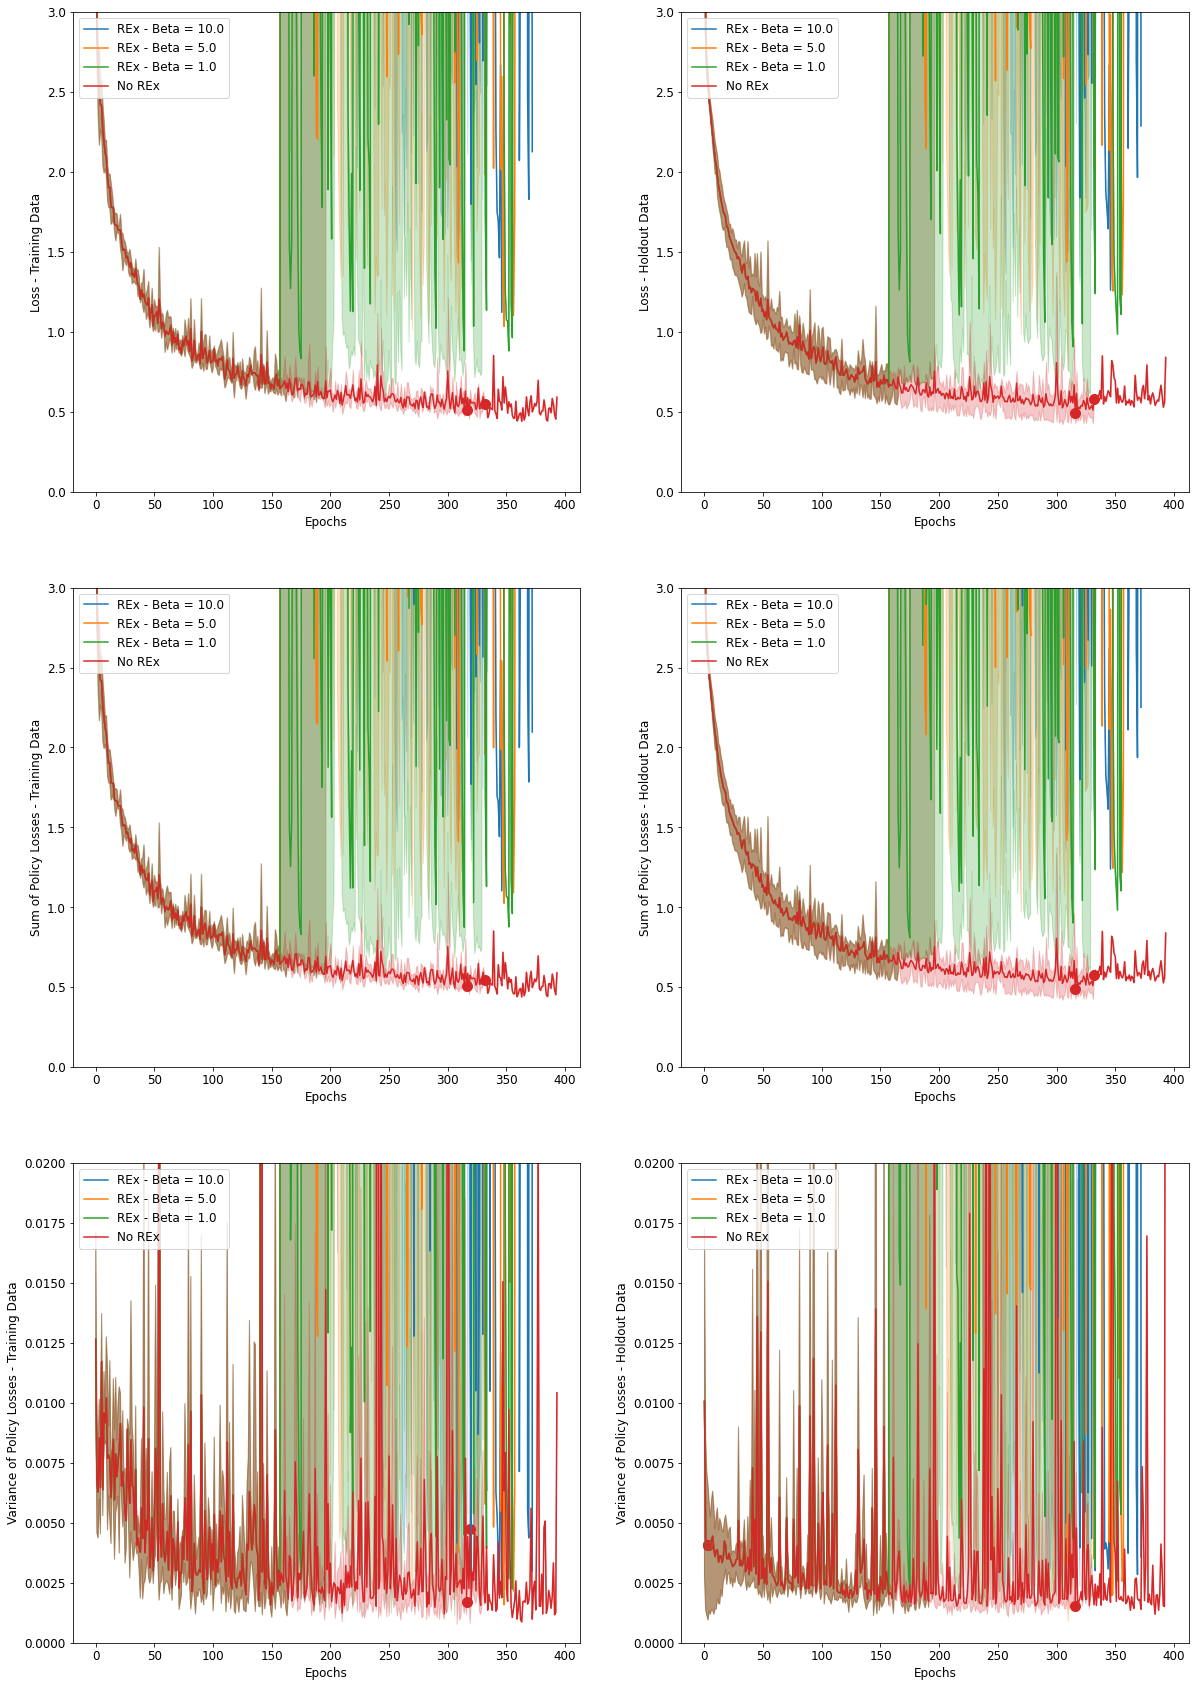

In [ ]:
plot_experiment_metrics(
    [
        ('model_loss_history',                   'Loss - Training Data',                      (0,3.0)),
        ('model_holdout_loss_history',           'Loss - Holdout Data',                       (0,3.0)),
        ('model_pol_total_loss_history',         'Sum of Policy Losses - Training Data',      (0,3.0)),
        ('model_holdout_pol_total_loss_history', 'Sum of Policy Losses - Holdout Data',       (0,3.0)),
        ('model_pol_var_loss_history',           'Variance of Policy Losses - Training Data', (0,0.02)),
        ('model_holdout_pol_var_loss_history',   'Variance of Policy Losses - Holdout Data',  (0,0.02)),
    ],
    [[
        ((MP814, MP815, MP816), 'REx - Beta = 10.0'),
        ((MP811, MP812, MP813), 'REx - Beta = 5.0'),
        ((MP808, MP809, MP810), 'REx - Beta = 1.0'),
        ((MP805, MP806, MP807), 'No REx'),
    ]],
    (3,2),
    starting_epoch=0
)

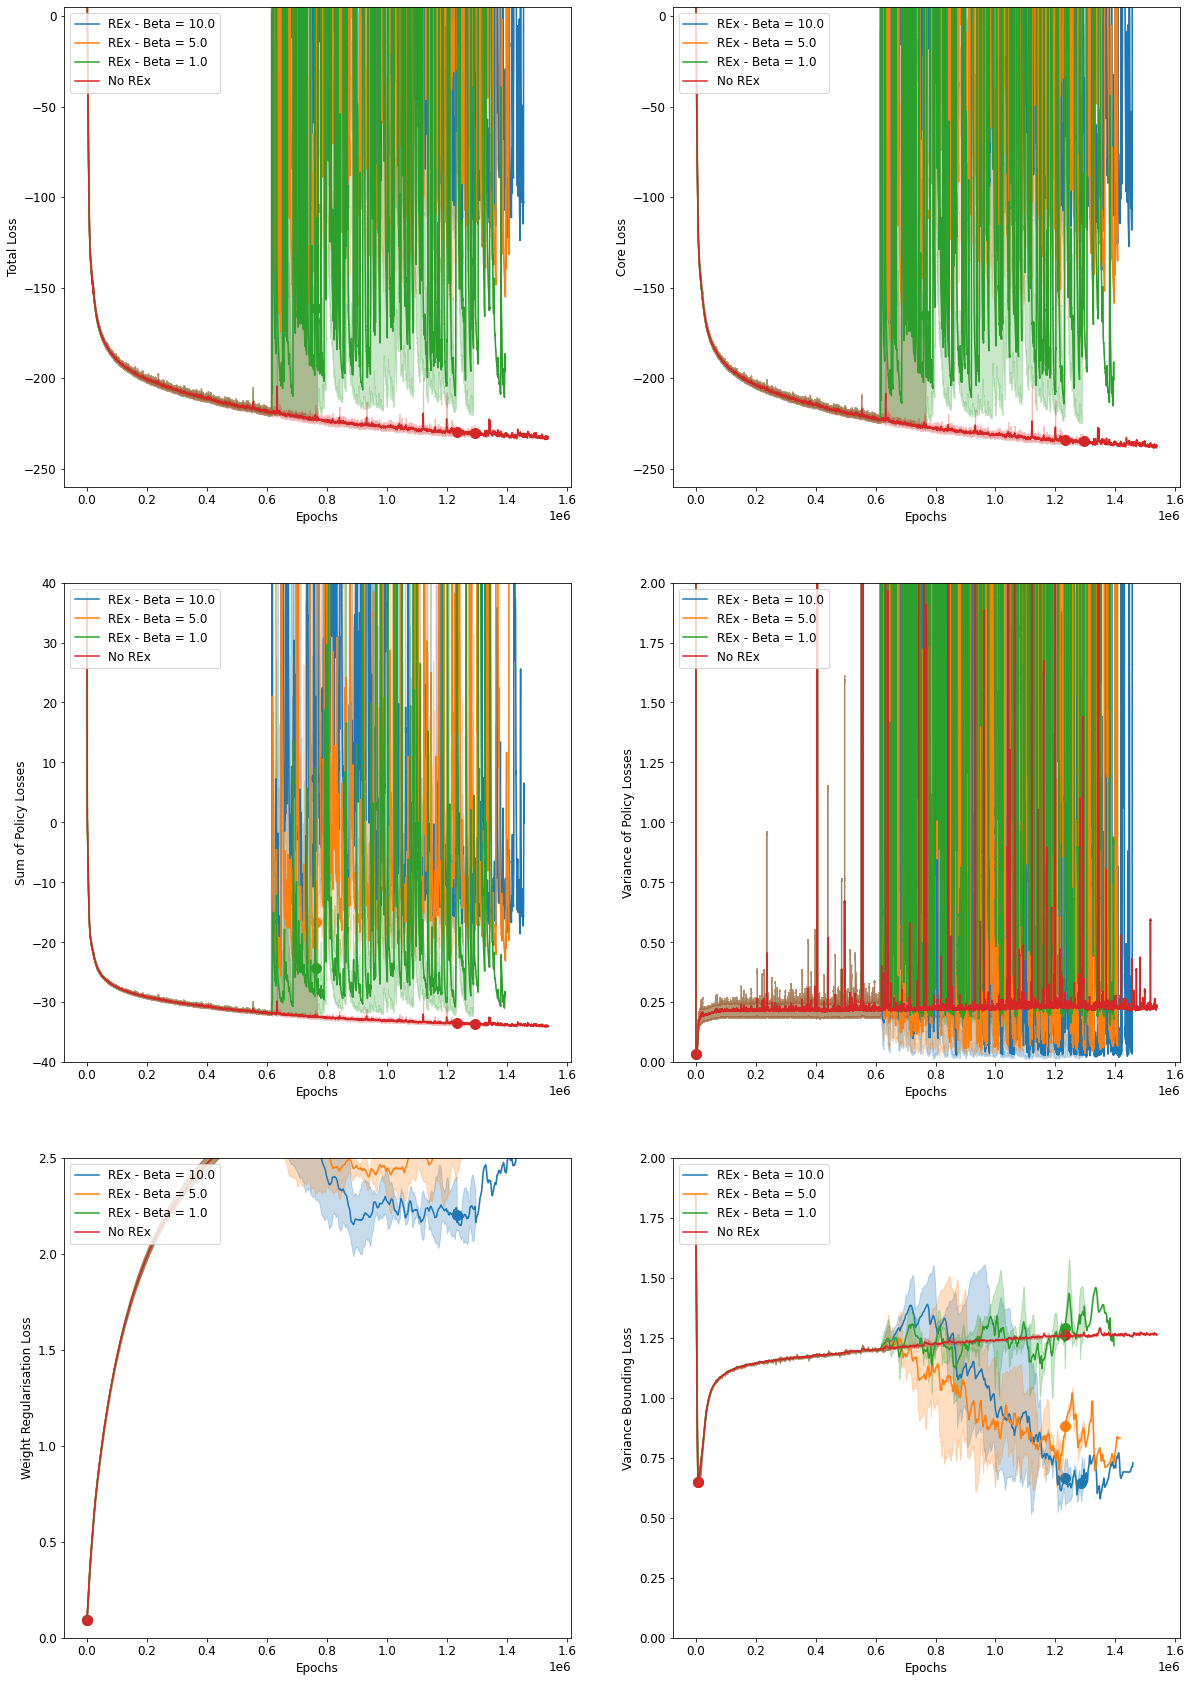

In [ ]:
plot_experiment_metrics(
    [
        ('model_train_loss_history',           'Total Loss',                 (-260,5)),
        ('model_train_core_loss_history',      'Core Loss',                  (-260,5)),
        ('model_train_pol_total_loss_history', 'Sum of Policy Losses',       (-40,40)),
        ('model_train_pol_var_loss_history',   'Variance of Policy Losses',  (0,2)),
        ('model_train_decay_loss_history',     'Weight Regularisation Loss', (0,2.5)),
        ('model_train_var_lim_loss_history',   'Variance Bounding Loss',     (0,2)),
    ],
    [[
        ((MP814, MP815, MP816), 'REx - Beta = 10.0'),
        ((MP811, MP812, MP813), 'REx - Beta = 5.0'),
        ((MP808, MP809, MP810), 'REx - Beta = 1.0'),
        ((MP805, MP806, MP807), 'No REx'),
    ]],
    (3,2),
    running_avg_size=256*5
)

In [6]:
#######################################
# MOPO - Penalty 1.0 - Rollout Length 5
#######################################
MP826 = get_results("MP826") # No Rex
MP827 = get_results("MP827")
MP828 = get_results("MP828")
MP829 = get_results("MP829") # REx - 1.0
MP830 = get_results("MP830")
MP831 = get_results("MP831")
MP832 = get_results("MP832") # REx - 5.0
MP833 = get_results("MP833")
MP834 = get_results("MP834")
MP835 = get_results("MP835") # REx - 10.0
MP836 = get_results("MP836")
MP837 = get_results("MP837")

In [7]:
#######################################
# MOPO - Penalty 5.0 - Rollout Length 5
#######################################
MP838 = get_results("MP838") # No Rex
MP839 = get_results("MP839")
MP840 = get_results("MP840")
MP841 = get_results("MP841") # REx - 1.0
MP842 = get_results("MP842")
MP843 = get_results("MP843")
MP844 = get_results("MP844") # REx - 5.0
MP845 = get_results("MP845")
MP846 = get_results("MP846")
MP847 = get_results("MP847") # REx - 10.0
MP848 = get_results("MP848")
MP849 = get_results("MP849")

In [8]:
########################################
# MOPO - Penalty 5.0 - Rollout Length 10
########################################
MP850 = get_results("MP850") # No Rex
MP851 = get_results("MP851")
MP852 = get_results("MP852")
MP853 = get_results("MP853") # REx - 1.0
MP854 = get_results("MP854")
MP855 = get_results("MP855")
MP856 = get_results("MP856") # REx - 5.0
MP857 = get_results("MP857")
MP858 = get_results("MP858")
MP859 = get_results("MP859") # REx - 10.0
MP860 = get_results("MP860")
MP861 = get_results("MP861")

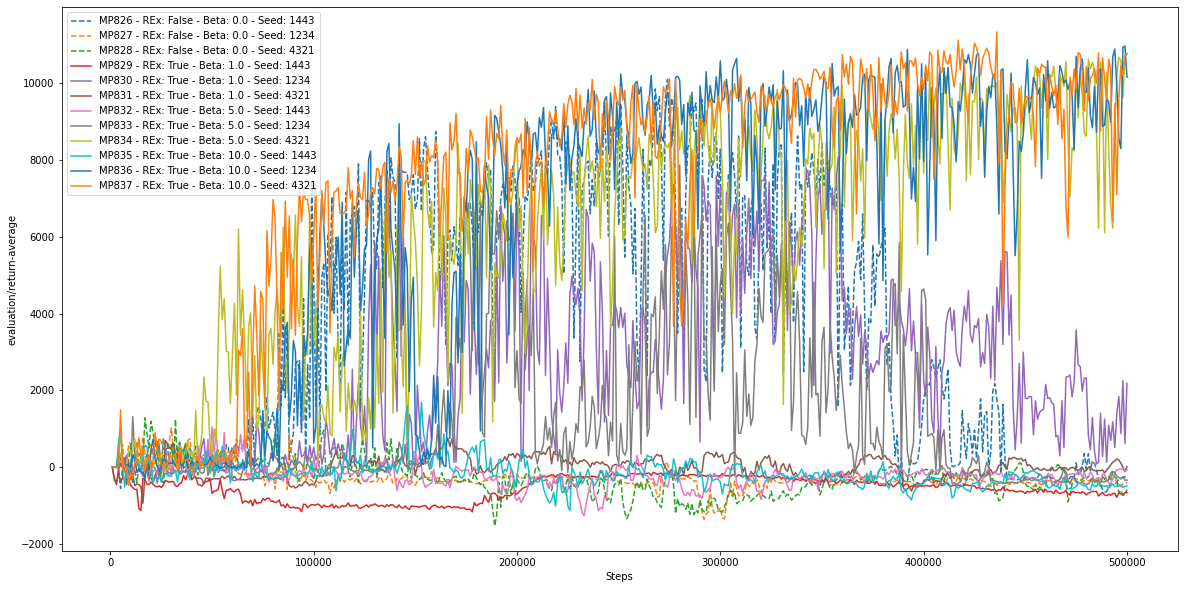

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp, rex, beta in [
    (MP826, False, 0.0),
    (MP827, False, 0.0),
    (MP828, False, 0.0),
    (MP829, True, 1.0),
    (MP830, True, 1.0),
    (MP831, True, 1.0),
    (MP832, True, 5.0),
    (MP833, True, 5.0),
    (MP834, True, 5.0),
    (MP835, True, 10.0),
    (MP836, True, 10.0),
    (MP837, True, 10.0),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], ls='--' if not rex else '-', label=f'{exp.name} - REx: {rex} - Beta: {beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

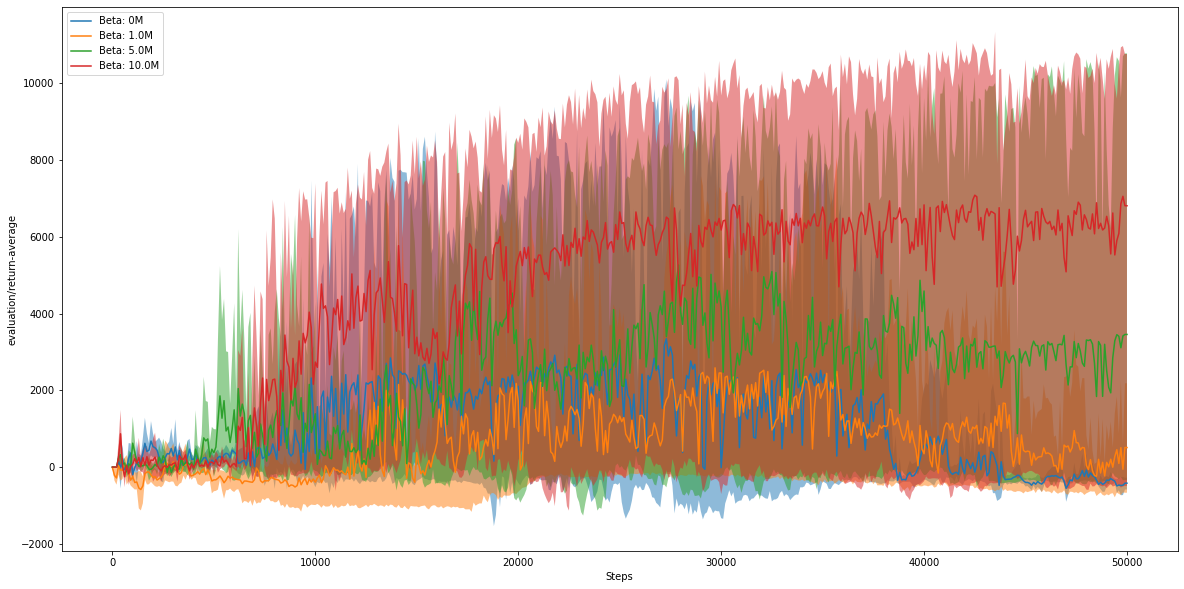

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp_set, steps in [
    ((MP826, MP827, MP828), '0'),
    ((MP829, MP830, MP831), '1.0'),
    ((MP832, MP833, MP834), '5.0'),
    ((MP835, MP836, MP837), '10.0'),
]:
    comb_arr = np.vstack(list(zip_longest(*[
        exp.sac.result[feature] for exp in exp_set
        ],
        fillvalue=np.NaN
    )))
    mean_arr = np.nanmean(comb_arr, axis=-1)
    min_arr = np.nanmin(comb_arr, axis=-1)
    max_arr = np.nanmax(comb_arr, axis=-1)
    x_vals = np.arange(len(mean_arr))*100
    ax.plot(x_vals, mean_arr, label=f'Beta: {steps}M')
    ax.fill_between(x_vals, min_arr, max_arr, alpha=0.5)
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
# ax.set_xlim(-1000,501000)
# ax.set_ylim(-3000,12500)
ax.legend(loc='upper left')
pass

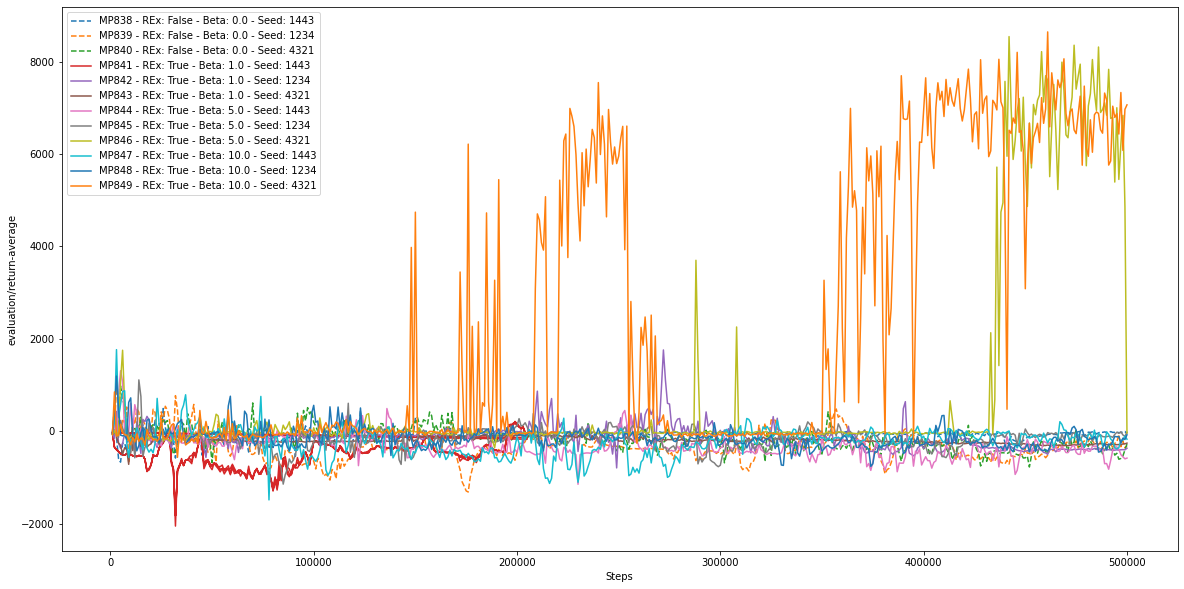

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp, rex, beta in [
    (MP838, False, 0.0),
    (MP839, False, 0.0),
    (MP840, False, 0.0),
    (MP841, True, 1.0),
    (MP842, True, 1.0),
    (MP843, True, 1.0),
    (MP844, True, 5.0),
    (MP845, True, 5.0),
    (MP846, True, 5.0),
    (MP847, True, 10.0),
    (MP848, True, 10.0),
    (MP849, True, 10.0),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], ls='--' if not rex else '-', label=f'{exp.name} - REx: {rex} - Beta: {beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

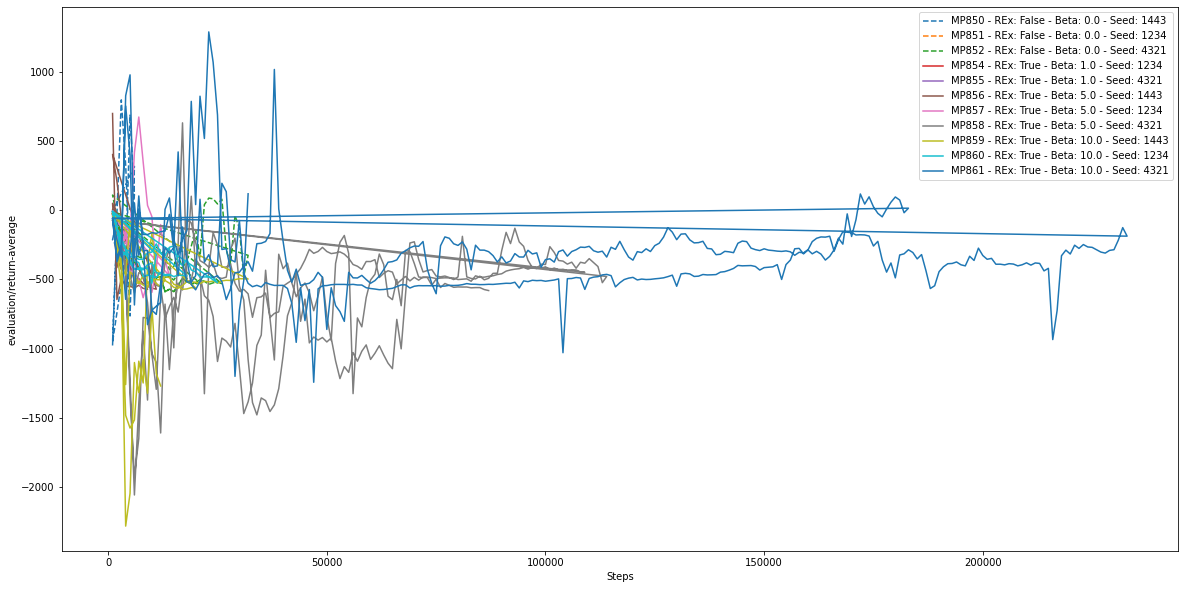

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp, rex, beta in [
    (MP850, False, 0.0),
    (MP851, False, 0.0),
    (MP852, False, 0.0),
    # (MP853, True, 1.0), # Broken
    (MP854, True, 1.0),
    (MP855, True, 1.0),
    (MP856, True, 5.0),
    (MP857, True, 5.0),
    (MP858, True, 5.0),
    (MP859, True, 10.0),
    (MP860, True, 10.0),
    (MP861, True, 10.0),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], ls='--' if not rex else '-', label=f'{exp.name} - REx: {rex} - Beta: {beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass